In [1]:
import pandas as pd
import numpy as np
import prettytable
from matplotlib import pyplot as plt
from dataPretreatment.dataEncoder import labelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt  # 画图工具
from sklearn import tree, linear_model  # 树、线性模型
from sklearn.model_selection import train_test_split # 数据切割
from sklearn.model_selection import GridSearchCV  # 网格搜索
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, \
    roc_auc_score  # 分类指标库
sns.set(style='whitegrid')

In [2]:
# read dataset
df_039 = pd.read_csv('dataset/dataset_039.csv')
df_110 = pd.read_csv('dataset/dataset_110.csv')
df_173 = pd.read_csv('dataset/dataset_173.csv')
df_196 = pd.read_csv('dataset/dataset_196.csv')

In [3]:
# classified columns
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
columns = numeric_columns + categorical_columns

In [4]:
# one-hot label coding
df_039 = labelEncoder.labelEncoder(df_039,labels=categorical_columns)
df_110 = labelEncoder.labelEncoder(df_110, labels=categorical_columns)
df_173 = labelEncoder.labelEncoder(df_173, labels=categorical_columns)
df_196 = labelEncoder.labelEncoder(df_196, labels=categorical_columns)

Column 'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'] : [ 0  1  2  3  4  5  6  7  8  9 10 11]
Column 'marital': ['divorced', 'married', 'single'] : [0 1 2]
Column 'education': ['primary', 'secondary', 'tertiary', 'unknown'] : [0 1 2 3]
Column 'default': ['no', 'yes'] : [0 1]
Column 'housing': ['no', 'yes'] : [0 1]
Column 'loan': ['no', 'yes'] : [0 1]
Column 'contact': ['cellular', 'telephone', 'unknown'] : [0 1 2]
Column 'month': ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'] : [ 0  1  2  3  4  5  6  7  8  9 10 11]
Column 'poutcome': ['failure', 'other', 'success', 'unknown'] : [0 1 2 3]
Column 'y': ['no', 'yes'] : [0 1]
Column 'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'] : [ 0  1  2  3  4  5  6  7  8  9 10 11]
C

In [6]:
# Splitting the data set into a training and test set
df_039_X = df_039.iloc[:, 0:-1]
df_039_y = df_039.iloc[:, -1]
df_039_X_train, df_039_X_test, df_039_y_train, df_039_y_test = train_test_split(df_039_X, df_039_y, test_size=0.25, random_state=0)
print( f'The length of training data and test data are {len(df_039_X_train)} and {len(df_039_X_test)}')

The length of training data and test data are 12295 and 4099


In [17]:
# The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
#See the sample and features
n_samples,n_features=df_039_X_train.shape
print('{:-^60}'.format('Check Data'))
print('The number of the data: {0} | The features of the data: {1}'.format(n_samples,n_features))
# train the logistic regression model
parameters = {'penalty':['l1','l2'],
              'C':[0.001,0.01,0.1,1,10,100],
              'solver':['liblinear','saga','lbfgs']} #
parameters = {'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']}
# train the cross-validation and grid search model
model_t = GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=10000), param_grid=parameters,verbose=0,cv=10,n_jobs=-1,scoring='roc_auc')  # 建立交叉检验模型对象，并行数与CPU一致
model_t.fit(df_039_X_train, df_039_y_train)
print('{:-^60}'.format('The optimal model parameters and score'))
print('The best score:', model_t.best_score_)
print('The best parameters:', model_t.best_params_)
df_039_lr_model = model_t.best_estimator_
# fit using the optimal parameters
df_039_lr_model.fit(df_039_X_train, df_039_y_train)
# predict
y_predict = df_039_lr_model.predict(df_039_X_test)  #
y_predict_df = pd.DataFrame(y_predict, columns=['y_predict'], index=df_039_y_test.index)
y_test_predict_df = pd.concat([df_039_y_test, y_predict_df], axis=1)
y_score = df_039_lr_model.predict_proba(df_039_X_test)  # 
print('Test data VS. Real data', '-' * 30, '\n', y_test_predict_df)
# initial evaluation
print('Model','-'*30,'\n',df_039_lr_model)
print('Optimal model coefficient','-'*30,'\n',df_039_lr_model.coef_)
print('Optimal model intercept','-'*30,'\n',df_039_lr_model.intercept_)
print('Optimal model score','-'*30,'\n',df_039_lr_model.score(df_039_X_test,df_039_y_test))
print(df_039_y_test)
print(y_score)
fpr, tpr, thresholds = roc_curve(df_039_y_test, y_score[:, 1])  # auc
accuracy = metrics.accuracy_score(df_039_y_test, y_predict) # 精度
confusionmatrix = metrics.confusion_matrix(df_039_y_test, y_predict) # 混淆矩阵
target_names = ['class 0', 'class 1'] # 两个类别
classifyreport = metrics.classification_report(df_039_y_test, y_predict,target_names=target_names) # 分类结果报告
print('分类准确率 ',accuracy) # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)
# 核心评估指标：accuracy，precision，recall，f1分数
accuracy_s = accuracy_score(df_039_y_test, y_predict).round(3)  # 准确率
precision_s = precision_score(df_039_y_test, y_predict).round(3)  # 精确度
recall_s = recall_score(df_039_y_test, y_predict).round(3)  # 召回率
f1_s = f1_score(df_039_y_test, y_predict).round(3)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
auc_s = auc(fpr, tpr).round(3)  # AUC
core_metrics.field_names = ['auc','accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print('{:-^60}'.format('核心评估指标'), '\n', core_metrics)

-------------------------Check Data-------------------------
The number of the data: 12295 | The features of the data: 16
-----------The optimal model parameters and score-----------
The best score: 0.8712138942480848
The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Test data VS. Real data ------------------------------ 
        y  y_predict
579    0          0
15713  0          0
8304   0          0
775    0          0
7550   0          0
...   ..        ...
3813   0          0
16224  1          0
10586  0          1
12593  0          0
9249   0          0

[4099 rows x 2 columns]
Model ------------------------------ 
 LogisticRegression(C=0.01, max_iter=10000)
Optimal model coefficient ------------------------------ 
 [[ 1.11990537e-02  1.58758418e-02  2.10532851e-01  1.72102391e-01
   1.86781595e-02  2.24444216e-05 -5.80383261e-01 -4.72221936e-01
  -5.77527291e-01 -3.00994022e-03  1.83989999e-02  3.79617278e-03
  -1.35346063e-01  2.10821790e-03  1.19844536e-01  1

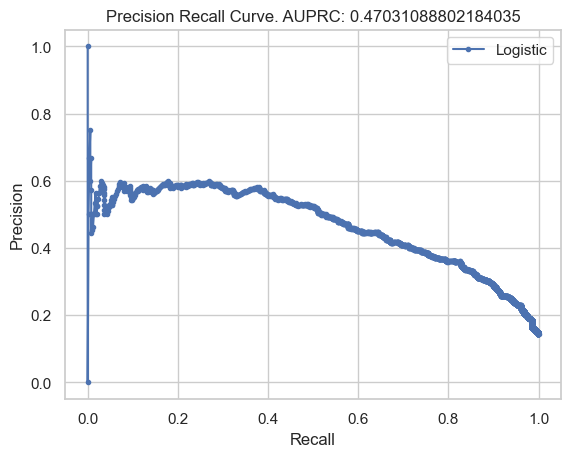

In [16]:
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

# y_pred_proba = df_039_lr_model.predict_proba(np.array(df_039_y_test))[:,1]

average_precision = average_precision_score(df_039_y_test, y_score[:, 1])

precision, recall, thresholds = precision_recall_curve(df_039_y_test, y_score[:, 1])

plt.plot(recall, precision, marker='.', label='Logistic')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

In [18]:
# Splitting the data set into a training and test set
df_110_X = df_110.iloc[:, 0:-1]
df_110_y = df_110.iloc[:, -1]
df_110_X_train, df_110_X_test, df_110_y_train, df_110_y_test = train_test_split(df_110_X, df_110_y, test_size=0.25, random_state=0)
print( f'The length of training data and test data are {len(df_110_X_train)} and {len(df_110_X_test)}')

The length of training data and test data are 12415 and 4139


In [19]:
# {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
#See the sample and features
n_samples,n_features=df_110_X_train.shape
print('{:-^60}'.format('Check Data'))
print('The number of the data: {0} | The features of the data: {1}'.format(n_samples,n_features))
# train the logistic regression model
parameters = {'penalty':['l1','l2'],
              'C':[0.001,0.01,0.1,1,10,100],
              'solver':['liblinear','saga','lbfgs']} #
parameters = {'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']} 
# train the cross-validation and grid search model
model_t = GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=10000), param_grid=parameters,verbose=0,cv=10,n_jobs=-1,scoring='roc_auc')  # 建立交叉检验模型对象，并行数与CPU一致
model_t.fit(df_110_X_train, df_110_y_train)
print('{:-^60}'.format('The optimal model parameters and score'))
print('The best score:', model_t.best_score_)
print('The best parameters:', model_t.best_params_)
df_110_lr_model = model_t.best_estimator_
# fit using the optimal parameters
df_110_lr_model.fit(df_110_X_train, df_110_y_train)
# predict
y_predict = df_110_lr_model.predict(df_110_X_test)  #
y_predict_df = pd.DataFrame(y_predict, columns=['y_predict'], index=df_110_y_test.index)
y_test_predict_df = pd.concat([df_110_y_test, y_predict_df], axis=1)
y_score = df_110_lr_model.predict_proba(df_110_X_test)  # 
print('Test data VS. Real data', '-' * 30, '\n', y_test_predict_df)
# initial evaluation
print('Model','-'*30,'\n',df_110_lr_model)
print('Optimal model coefficient','-'*30,'\n',df_110_lr_model.coef_)
print('Optimal model intercept','-'*30,'\n',df_110_lr_model.intercept_)
print('Optimal model score','-'*30,'\n',df_110_lr_model.score(df_110_X_test,df_110_y_test))
print(df_110_y_test)
print(y_score)
fpr, tpr, thresholds = roc_curve(df_110_y_test, y_score[:, 1])  # auc
accuracy = metrics.accuracy_score(df_110_y_test, y_predict) # 精度
confusionmatrix = metrics.confusion_matrix(df_110_y_test, y_predict) # 混淆矩阵
target_names = ['class 0', 'class 1'] # 两个类别
classifyreport = metrics.classification_report(df_110_y_test, y_predict,target_names=target_names) # 分类结果报告
print('分类准确率 ',accuracy) # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)
# 核心评估指标：accuracy，precision，recall，f1分数
accuracy_s = accuracy_score(df_110_y_test, y_predict).round(3)  # 准确率
precision_s = precision_score(df_110_y_test, y_predict).round(3)  # 精确度
recall_s = recall_score(df_110_y_test, y_predict).round(3)  # 召回率
f1_s = f1_score(df_110_y_test, y_predict).round(3)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
auc_s = auc(fpr, tpr).round(3)  # AUC
core_metrics.field_names = ['auc','accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print('{:-^60}'.format('核心评估指标'), '\n', core_metrics)

-------------------------Check Data-------------------------
The number of the data: 12415 | The features of the data: 16
-----------The optimal model parameters and score-----------
The best score: 0.8706856073491613
The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Test data VS. Real data ------------------------------ 
        y  y_predict
1476   0          0
10409  0          0
16544  1          0
379    0          0
4431   0          0
...   ..        ...
14483  0          0
4374   0          0
14833  1          1
9068   0          0
7286   0          0

[4139 rows x 2 columns]
Model ------------------------------ 
 LogisticRegression(C=0.01, max_iter=10000)
Optimal model coefficient ------------------------------ 
 [[ 1.67236967e-02  2.27822224e-02  2.63886869e-01  2.49569227e-01
  -9.10909170e-02  2.49231881e-05 -5.47389511e-01 -2.89946233e-01
  -5.47900982e-01 -4.26885063e-03  2.22826491e-02  3.74692145e-03
  -1.14959456e-01  2.40172408e-03  9.50270900e-02  1

In [20]:
# Splitting the data set into a training and test set
df_173_X = df_173.iloc[:, 0:-1]
df_173_y = df_173.iloc[:, -1]
df_173_X_train, df_173_X_test, df_173_y_train, df_173_y_test = train_test_split(df_173_X, df_173_y, test_size=0.25, random_state=0)
print( f'The length of training data and test data are {len(df_173_X_train)} and {len(df_173_X_test)}')

The length of training data and test data are 13154 and 4385


In [21]:
# The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
#See the sample and features
n_samples,n_features=df_173_X_train.shape
print('{:-^60}'.format('Check Data'))
print('The number of the data: {0} | The features of the data: {1}'.format(n_samples,n_features))
# train the logistic regression model
parameters = {'penalty':['l1','l2'],
              'C':[0.001,0.01,0.1,1,10,100],
              'solver':['liblinear','saga','lbfgs']} #
parameters = {'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']} 
# train the cross-validation and grid search model
model_t = GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=10000), param_grid=parameters,verbose=0,cv=10,n_jobs=-1,scoring='roc_auc')  # 建立交叉检验模型对象，并行数与CPU一致
model_t.fit(df_173_X_train, df_173_y_train)
print('{:-^60}'.format('The optimal model parameters and score'))
print('The best score:', model_t.best_score_)
print('The best parameters:', model_t.best_params_)
df_173_lr_model = model_t.best_estimator_
# fit using the optimal parameters
df_173_lr_model.fit(df_173_X_train, df_173_y_train)
# predict
y_predict = df_173_lr_model.predict(df_173_X_test)  #
y_predict_df = pd.DataFrame(y_predict, columns=['y_predict'], index=df_173_y_test.index)
y_test_predict_df = pd.concat([df_173_y_test, y_predict_df], axis=1)
y_score = df_173_lr_model.predict_proba(df_173_X_test)  # 
print('Test data VS. Real data', '-' * 30, '\n', y_test_predict_df)
# initial evaluation
print('Model','-'*30,'\n',df_173_lr_model)
print('Optimal model coefficient','-'*30,'\n',df_173_lr_model.coef_)
print('Optimal model intercept','-'*30,'\n',df_173_lr_model.intercept_)
print('Optimal model score','-'*30,'\n',df_173_lr_model.score(df_173_X_test,df_173_y_test))
print(df_173_y_test)
print(y_score)
fpr, tpr, thresholds = roc_curve(df_173_y_test, y_score[:, 1])  # auc
accuracy = metrics.accuracy_score(df_173_y_test, y_predict) # 精度
confusionmatrix = metrics.confusion_matrix(df_173_y_test, y_predict) # 混淆矩阵
target_names = ['class 0', 'class 1'] # 两个类别
classifyreport = metrics.classification_report(df_173_y_test, y_predict,target_names=target_names) # 分类结果报告
print('分类准确率 ',accuracy) # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)
# 核心评估指标：accuracy，precision，recall，f1分数
accuracy_s = accuracy_score(df_173_y_test, y_predict).round(3)  # 准确率
precision_s = precision_score(df_173_y_test, y_predict).round(3)  # 精确度
recall_s = recall_score(df_173_y_test, y_predict).round(3)  # 召回率
f1_s = f1_score(df_173_y_test, y_predict).round(3)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
auc_s = auc(fpr, tpr).round(3)  # AUC
core_metrics.field_names = ['auc','accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print('{:-^60}'.format('核心评估指标'), '\n', core_metrics)

-------------------------Check Data-------------------------
The number of the data: 13154 | The features of the data: 16
-----------The optimal model parameters and score-----------
The best score: 0.8683916835227373
The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Test data VS. Real data ------------------------------ 
        y  y_predict
13957  0          0
14232  1          0
3539   0          0
17016  1          1
737    0          0
...   ..        ...
890    0          0
8416   0          0
7699   0          0
1542   0          0
11604  0          0

[4385 rows x 2 columns]
Model ------------------------------ 
 LogisticRegression(C=0.01, max_iter=10000)
Optimal model coefficient ------------------------------ 
 [[ 1.20440080e-02  1.06940007e-02  1.67284189e-01  1.78610003e-01
  -1.16367978e-01  3.83996454e-05 -6.71898944e-01 -3.97573205e-01
  -6.01587311e-01 -7.94010423e-03  2.56083193e-02  3.41338268e-03
  -1.29489477e-01  2.92363632e-03  3.89275803e-02  1

In [22]:
# Splitting the data set into a training and test set
df_196_X = df_196.iloc[:, 0:-1]
df_196_y = df_196.iloc[:, -1]
df_196_X_train, df_196_X_test, df_196_y_train, df_196_y_test = train_test_split(df_196_X, df_196_y, test_size=0.25, random_state=0)
print( f'The length of training data and test data are {len(df_196_X_train)} and {len(df_196_X_test)}')

The length of training data and test data are 9114 and 3039


In [23]:
# The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}hu
#See the sample and features
n_samples,n_features=df_196_X_train.shape
print('{:-^60}'.format('Check Data'))
print('The number of the data: {0} | The features of the data: {1}'.format(n_samples,n_features))
# train the logistic regression model
parameters = {'penalty':['l1','l2'],
              'C':[0.001,0.01,0.1,1,10,100],
              'solver':['liblinear','saga','lbfgs']} #
parameters = {'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']} 
# train the cross-validation and grid search model
model_t = GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=10000), param_grid=parameters,verbose=0,cv=10,n_jobs=-1,scoring='roc_auc')  # 建立交叉检验模型对象，并行数与CPU一致
model_t.fit(df_196_X_train, df_196_y_train)
print('{:-^60}'.format('The optimal model parameters and score'))
print('The best score:', model_t.best_score_)
print('The best parameters:', model_t.best_params_)
df_196_lr_model = model_t.best_estimator_
# fit using the optimal parameters
df_196_lr_model.fit(df_196_X_train, df_196_y_train)
# predict
y_predict = df_196_lr_model.predict(df_196_X_test)  #
y_predict_df = pd.DataFrame(y_predict, columns=['y_predict'], index=df_196_y_test.index)
y_test_predict_df = pd.concat([df_196_y_test, y_predict_df], axis=1)
y_score = df_196_lr_model.predict_proba(df_196_X_test)  # 
print('Test data VS. Real data', '-' * 30, '\n', y_test_predict_df)
# initial evaluation
print('Model','-'*30,'\n',df_196_lr_model)
print('Optimal model coefficient','-'*30,'\n',df_196_lr_model.coef_)
print('Optimal model intercept','-'*30,'\n',df_196_lr_model.intercept_)
print('Optimal model score','-'*30,'\n',df_196_lr_model.score(df_196_X_test,df_196_y_test))
print(df_196_y_test)
print(y_score)
fpr, tpr, thresholds = roc_curve(df_196_y_test, y_score[:, 1])  # auc
accuracy = metrics.accuracy_score(df_196_y_test, y_predict) # 精度
confusionmatrix = metrics.confusion_matrix(df_196_y_test, y_predict) # 混淆矩阵
target_names = ['class 0', 'class 1'] # 两个类别
classifyreport = metrics.classification_report(df_196_y_test, y_predict,target_names=target_names) # 分类结果报告
print('分类准确率 ',accuracy) # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)
# 核心评估指标：accuracy，precision，recall，f1分数
accuracy_s = accuracy_score(df_196_y_test, y_predict).round(3)  # 准确率
precision_s = precision_score(df_196_y_test, y_predict).round(3)  # 精确度
recall_s = recall_score(df_196_y_test, y_predict).round(3)  # 召回率
f1_s = f1_score(df_196_y_test, y_predict).round(3)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
auc_s = auc(fpr, tpr).round(3)  # AUC
core_metrics.field_names = ['auc','accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print('{:-^60}'.format('核心评估指标'), '\n', core_metrics)

-------------------------Check Data-------------------------
The number of the data: 9114 | The features of the data: 16
-----------The optimal model parameters and score-----------
The best score: 0.8602383172148184
The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Test data VS. Real data ------------------------------ 
        y  y_predict
7700   0          0
8191   0          0
3237   0          0
9101   1          0
2730   0          0
...   ..        ...
8480   0          0
785    0          0
7280   0          0
10809  1          0
1893   1          0

[3039 rows x 2 columns]
Model ------------------------------ 
 LogisticRegression(C=0.01, max_iter=10000)
Optimal model coefficient ------------------------------ 
 [[ 1.34183140e-02  2.35639956e-02  1.66187758e-01  1.74423594e-01
   9.87920596e-03  1.06522684e-06 -5.65414767e-01 -3.79896410e-01
  -5.26373828e-01 -3.76017850e-03  1.46287592e-02  3.72948258e-03
  -1.24168215e-01  2.56869439e-03  1.05436210e-01  9.

In [24]:
df_039_lr_model_probs_test = df_039_lr_model.predict_proba(df_039_X_test)
df_110_lr_model_probs_test = df_110_lr_model.predict_proba(df_110_X_test)
df_173_lr_model_probs_test = df_173_lr_model.predict_proba(df_173_X_test)
df_196_lr_model_probs_test = df_196_lr_model.predict_proba(df_196_X_test)

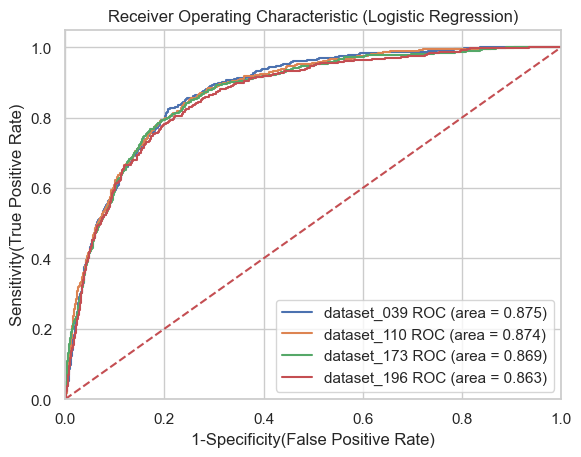

In [26]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'dataset_039',
    'probs': df_039_lr_model_probs_test[:,1],
    'y_ture':df_039_y_test
},
{
    'label': 'dataset_110',
    'probs': df_110_lr_model_probs_test[:,1],
    'y_ture':df_110_y_test
},
{
    'label': 'dataset_173',
    'probs': df_173_lr_model_probs_test[:,1],
    'y_ture':df_173_y_test
},
    {
    'label': 'dataset_196',
    'probs': df_196_lr_model_probs_test[:,1],
    'y_ture':df_196_y_test
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = m['y_ture'], 
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(m['y_ture'], 
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()

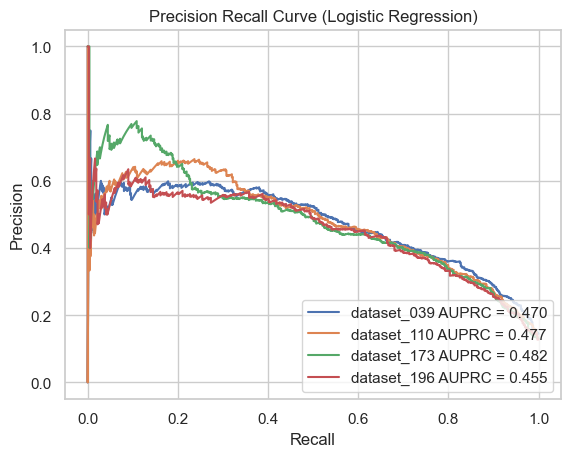

In [37]:
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'dataset_039',
    'probs': df_039_lr_model_probs_test[:,1],
    'y_ture':df_039_y_test
},
{
    'label': 'dataset_110',
    'probs': df_110_lr_model_probs_test[:,1],
    'y_ture':df_110_y_test
},
{
    'label': 'dataset_173',
    'probs': df_173_lr_model_probs_test[:,1],
    'y_ture':df_173_y_test
},
    {
    'label': 'dataset_196',
    'probs': df_196_lr_model_probs_test[:,1],
    'y_ture':df_196_y_test
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
    average_precision = average_precision_score(m['y_ture'],m['probs'])

    precision, recall, thresholds = precision_recall_curve(m['y_ture'], m['probs'])

    plt.plot(recall, precision, label='%s AUPRC = %0.3f' % (m['label'], average_precision))



# Settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve (Logistic Regression)')
plt.legend(loc="lower right")

# Plot!
plt.show()